In [1]:
import pandas as pd
import numpy as np
import itertools    
import matplotlib.pyplot as plt
import time
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder,scale,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel('IPM Jatim 2018.xlsx')
df.head()

,Daerah,AKB,Keluhan Kesehatan,Sarana Kesehatan,Angka Melek Huruf,APS-SMA,Persentase Miskin,PDRB,Pertumbuhan Ekonomi,Pengangguran Terbuka,IPM
0,Pacitan,19.71,42.07,3,92.57,76.12,14.19,5.51,5.47,1.39,67.33
1,Ponorogo,22.21,53.78,5,89.11,77.50,10.36,5.31,5.27,3.77,69.91
2,Trenggalek,18.28,48.01,1,94.41,76.78,12.02,5.03,5.03,4.12,68.71
3,Tulungagung,18.91,48.32,12,96.84,78.54,7.27,5.21,5.21,2.53,71.99
4,Blitar,20.67,41.78,7,94.49,68.80,9.72,5.10,5.10,3.38,69.93


In [3]:
print("Number of null values:", df.isnull().sum())

Number of null values: Daerah                  0
AKB                     0
Keluhan Kesehatan       0
Sarana Kesehatan        0
Angka Melek Huruf       0
APS-SMA                 0
Persentase Miskin       0
PDRB                    0
Pertumbuhan Ekonomi     0
Pengangguran Terbuka    0
IPM                     0
dtype: int64


In [4]:
print("Dimension of the original data:", df.shape)

df_clean = df.dropna().drop(['Daerah'], axis=1)
print("Dimension of modified data :", df_clean.shape)


Dimension of the original data: (38, 11)
Dimension of modified data : (38, 10)


In [5]:
kw = df_clean.copy()

In [6]:
corr_matrix = kw.corr()
corr_matrix

,AKB,Keluhan Kesehatan,Sarana Kesehatan,Angka Melek Huruf,APS-SMA,Persentase Miskin,PDRB,Pertumbuhan Ekonomi,Pengangguran Terbuka,IPM
AKB,1.000000,-0.116594,-0.258732,-0.763542,-0.664867,0.623447,-0.552713,-0.570343,-0.113557,-0.731380
Keluhan Kesehatan,-0.116594,1.000000,0.153602,0.132343,-0.062334,-0.130683,0.206405,0.165364,0.088186,0.149093
Sarana Kesehatan,-0.258732,0.153602,1.000000,0.424559,0.062574,-0.393216,0.424723,0.411763,0.493145,0.502272
Angka Melek Huruf,-0.763542,0.132343,0.424559,1.000000,0.634086,-0.845115,0.719969,0.746246,0.415713,0.871347
APS-SMA,-0.664867,-0.062334,0.062574,0.634086,1.000000,-0.536298,0.427615,0.445413,0.156877,0.689825
Persentase Miskin,0.623447,-0.130683,-0.393216,-0.845115,-0.536298,1.000000,-0.802915,-0.824902,-0.324321,-0.819966
PDRB,-0.552713,0.206405,0.424723,0.719969,0.427615,-0.802915,1.000000,0.991172,0.286285,0.704331
Pertumbuhan Ekonomi,-0.570343,0.165364,0.411763,0.746246,0.445413,-0.824902,0.991172,1.000000,0.271336,0.725403
Pengangguran Terbuka,-0.113557,0.088186,0.493145,0.415713,0.156877,-0.324321,0.286285,0.271336,1.000000,0.427995
IPM,-0.731380,0.149093,0.502272,0.871347,0.689825,-0.819966,0.704331,0.725403,0.427995,1.000000


<Axes: >

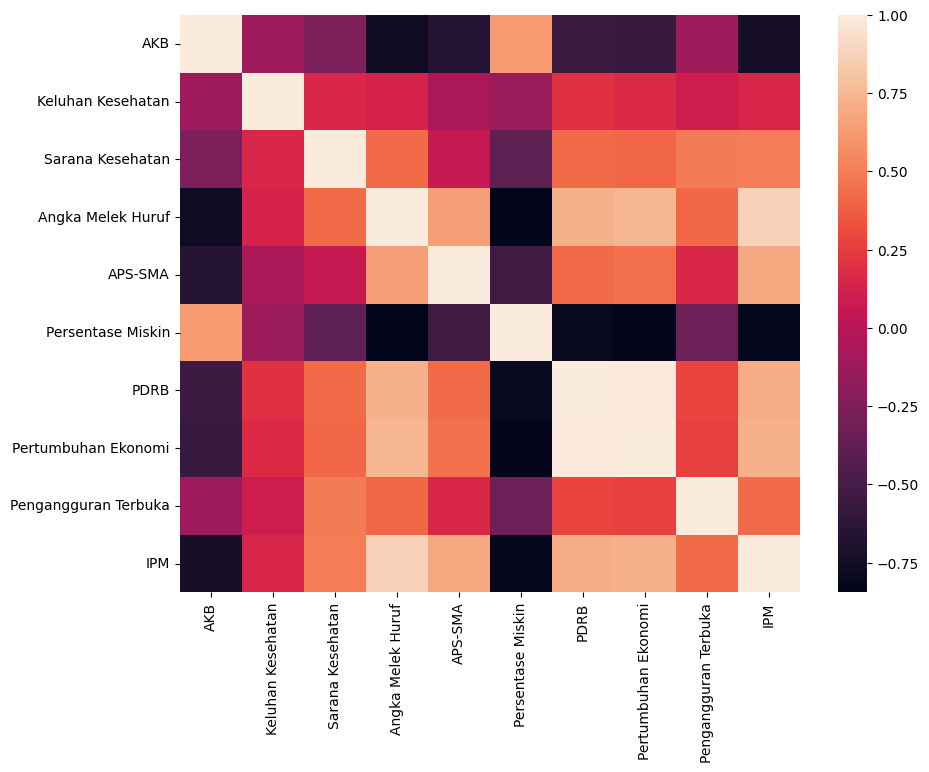

In [7]:
fig = plt.figure(figsize=(10,7.5))
sns.heatmap(corr_matrix)

Text(0.5, 1.0, 'Correlation Plot')

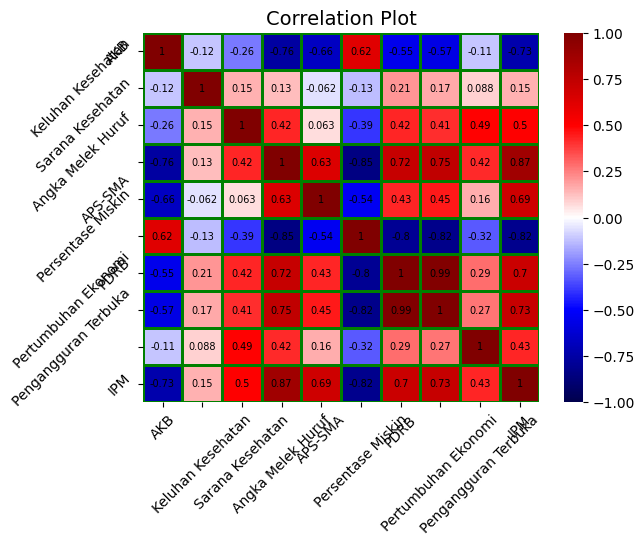

In [8]:
sns.heatmap(corr_matrix, 
            cmap = 'seismic', 
            linewidth = 0.75,
            linecolor = 'green',
            cbar = True,
            vmin = -1,
            vmax = 1,
            annot = True,
            annot_kws = {'size': 7,'color':'black'})
plt.tick_params(labelsize = 10, rotation = 45)
plt.title('Correlation Plot',size = 14)

In [9]:
y = df_clean['IPM']  # Target variable
X = df_clean.drop(['IPM'], axis=1)  # Feature matrix
X.head()

,AKB,Keluhan Kesehatan,Sarana Kesehatan,Angka Melek Huruf,APS-SMA,Persentase Miskin,PDRB,Pertumbuhan Ekonomi,Pengangguran Terbuka
0,19.71,42.07,3,92.57,76.12,14.19,5.51,5.47,1.39
1,22.21,53.78,5,89.11,77.50,10.36,5.31,5.27,3.77
2,18.28,48.01,1,94.41,76.78,12.02,5.03,5.03,4.12
3,18.91,48.32,12,96.84,78.54,7.27,5.21,5.21,2.53
4,20.67,41.78,7,94.49,68.80,9.72,5.10,5.10,3.38


In [10]:
def processsubset(featureset):
    model = sm.OLS(y,X[list(featureset)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(featureset)])-y)**2).sum()
    return {"model":regr,"RSS":RSS}

In [11]:
def getbest(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns,k):
        results.append(processsubset(combo))
    models = pd.DataFrame(results)

    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed", models.shape[0], k, "predictors in", toc-tic, "seconds")
   
    return best_model

In [12]:
model_best = pd.DataFrame(columns = ["RSS","model"])

tic = time.time()
for i in range(1,10):
    model_best.loc[i] = getbest(i)
toc = time.time()
print("Total elapsed time :",(toc-tic),"seconds")

Processed 9 1 predictors in 0.020137310028076172 seconds
Processed 36 2 predictors in 0.059610605239868164 seconds
Processed 84 3 predictors in 0.09540748596191406 seconds
Processed 126 4 predictors in 0.15120625495910645 seconds
Processed 126 5 predictors in 0.1487445831298828 seconds
Processed 84 6 predictors in 0.11606597900390625 seconds
Processed 36 7 predictors in 0.04213094711303711 seconds
Processed 9 8 predictors in 0.008414268493652344 seconds
Processed 1 9 predictors in 0.0 seconds
Total elapsed time : 0.6626834869384766 seconds


In [13]:
model_best

,RSS,model
1,250.637703,<statsmodels.regression.linear_model.Regressio...
2,211.631853,<statsmodels.regression.linear_model.Regressio...
3,169.75224,<statsmodels.regression.linear_model.Regressio...
4,163.873348,<statsmodels.regression.linear_model.Regressio...
5,159.403435,<statsmodels.regression.linear_model.Regressio...
6,158.080922,<statsmodels.regression.linear_model.Regressio...
7,156.730123,<statsmodels.regression.linear_model.Regressio...
8,155.802209,<statsmodels.regression.linear_model.Regressio...
9,155.732593,<statsmodels.regression.linear_model.Regressio...


In [14]:
print(model_best.loc[2]["model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                    IPM   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.635e+04
Date:                Wed, 12 Mar 2025   Prob (F-statistic):                    5.56e-54
Time:                        14:07:06   Log-Likelihood:                         -86.548
No. Observations:                  38   AIC:                                      177.1
Df Residuals:                      36   BIC:                                      180.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [15]:
print(model_best.loc[2,"model"].rsquared)

0.9989000501154163


In [16]:
model_best.apply(lambda row:row[1].rsquared, axis=1)

C:\Users\ilham\AppData\Local\Temp\ipykernel_8976\3471709294.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model_best.apply(lambda row:row[1].rsquared, axis=1)


1    0.998697
2    0.998900
3    0.999118
4    0.999148
5    0.999172
6    0.999178
7    0.999185
8    0.999190
9    0.999191
dtype: float64

C:\Users\ilham\AppData\Local\Temp\ipykernel_8976\2708560098.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rsquared_adj = model_best.apply(lambda row: row[1].rsquared_adj, axis=1)
C:\Users\ilham\AppData\Local\Temp\ipykernel_8976\2708560098.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aic = model_best.apply(lambda row: row[1].aic, axis=1)
C:\Users\ilham\AppData\Local\Temp\ipykernel_8976\2708560098.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by p

Text(0, 0.5, 'BIC')

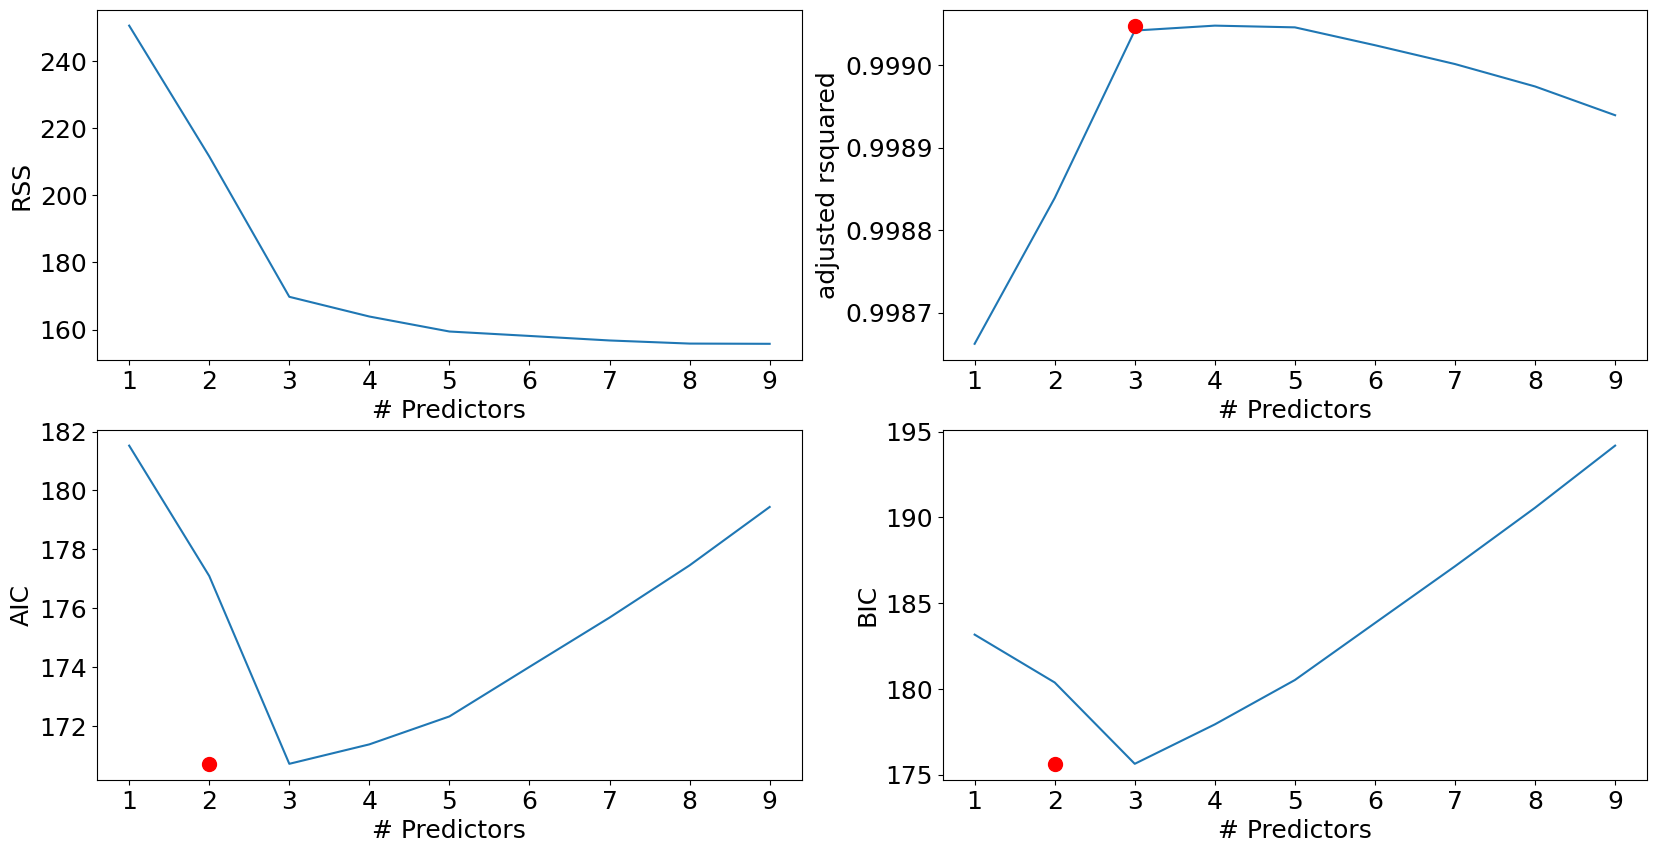

In [17]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18,'lines.markersize':10})

plt.subplot(2,2,1)

plt.plot(model_best["RSS"])
plt.xlabel("# Predictors")
plt.ylabel("RSS")

rsquared_adj = model_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2,2,2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), 'or')
plt.xlabel("# Predictors")
plt.ylabel('adjusted rsquared')

aic = model_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2,2,3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), 'or')
plt.xlabel("# Predictors")
plt.ylabel('AIC')

bic = model_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2,2,4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), 'or')
plt.xlabel("# Predictors")
plt.ylabel('BIC')



# FORWARD STEPWISE

In [18]:
def forward(predictors):
    remaining_predictors = [p for p in X.columns if p not in predictors]

    tic = time.time()

    results = []

    for p in remaining_predictors:
        results.append(processsubset(predictors+[p]))

    models = pd.DataFrame(results)

    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()

    print("Processed", models.shape[0], "predictors in", toc-tic, "seconds")

    return best_model

In [19]:
models_fwd = pd.DataFrame(columns = ["RSS","model"])

tic = time.time()
predictors = []

for i in range(1, len(X.columns)+1):
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time :",(toc-tic),"seconds")

Processed 9 predictors in 0.011147499084472656 seconds
Processed 8 predictors in 0.011920928955078125 seconds
Processed 7 predictors in 0.007573366165161133 seconds
Processed 6 predictors in 0.006833791732788086 seconds
Processed 5 predictors in 0.00887298583984375 seconds
Processed 4 predictors in 0.004656314849853516 seconds
Processed 3 predictors in 0.003702878952026367 seconds
Processed 2 predictors in 0.0 seconds
Processed 1 predictors in 0.007575511932373047 seconds
Total elapsed time : 0.0679161548614502 seconds


In [20]:
print(models_fwd.loc[2]["model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                    IPM   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.635e+04
Date:                Wed, 12 Mar 2025   Prob (F-statistic):                    5.56e-54
Time:                        14:07:07   Log-Likelihood:                         -86.548
No. Observations:                  38   AIC:                                      177.1
Df Residuals:                      36   BIC:                                      180.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [21]:
print(model_best.loc[2]["model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                    IPM   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.635e+04
Date:                Wed, 12 Mar 2025   Prob (F-statistic):                    5.56e-54
Time:                        14:07:07   Log-Likelihood:                         -86.548
No. Observations:                  38   AIC:                                      177.1
Df Residuals:                      36   BIC:                                      180.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

# BACKWARD


In [22]:
def backward(predictors):
    tic = time.time()

    results = []

    for combo in itertools.combinations(predictors,len(predictors)-1):
        results.append(processsubset(combo))
    models = pd.DataFrame(results)

    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print('Processed',models.shape[0],'models on',len(predictors)-1, 'predictors in',toc-tic,'seconds')

    return best_model

In [23]:
models_bwd = pd.DataFrame(columns = ["RSS","model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]['model'].model.exog_names
toc = time.time()
print("Total elapsed time :",(toc-tic),"seconds")

Processed 9 models on 8 predictors in 0.029379606246948242 seconds
Processed 8 models on 7 predictors in 0.012094259262084961 seconds
Processed 7 models on 6 predictors in 0.011029243469238281 seconds
Processed 6 models on 5 predictors in 0.008676290512084961 seconds
Processed 5 models on 4 predictors in 0.002955913543701172 seconds
Processed 4 models on 3 predictors in 0.0036764144897460938 seconds
Processed 3 models on 2 predictors in 0.007787466049194336 seconds
Processed 2 models on 1 predictors in 0.00587773323059082 seconds
Total elapsed time : 0.08540701866149902 seconds


In [24]:
print("BEST SUBSET")
print(model_best.loc[7,'model'].params)

BEST SUBSET
Keluhan Kesehatan       0.067926
Sarana Kesehatan        0.116435
Angka Melek Huruf       0.539865
APS-SMA                 0.148162
PDRB                   -2.974397
Pertumbuhan Ekonomi     3.921060
Pengangguran Terbuka    0.195383
dtype: float64


In [25]:
print("FORWARD SELECTION")
print(models_fwd.loc[7,'model'].params)

FORWARD SELECTION
Angka Melek Huruf       0.539865
APS-SMA                 0.148162
Sarana Kesehatan        0.116435
Pertumbuhan Ekonomi     3.921060
Keluhan Kesehatan       0.067926
PDRB                   -2.974397
Pengangguran Terbuka    0.195383
dtype: float64


In [26]:
print("BACKWARD SELECTION")
print(models_bwd.loc[7,'model'].params)

BACKWARD SELECTION
Keluhan Kesehatan       0.067926
Sarana Kesehatan        0.116435
Angka Melek Huruf       0.539865
APS-SMA                 0.148162
PDRB                   -2.974397
Pertumbuhan Ekonomi     3.921060
Pengangguran Terbuka    0.195383
dtype: float64


# RIDGE REGRESSION


In [27]:
df = pd.read_excel('IPM JATIM 2018.xlsx').dropna().drop('Daerah', axis = 1)

In [28]:
y = df['IPM']
X = df.drop(['IPM'], axis = 1).astype('float64')

In [29]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalisasi fitur

In [31]:
ridge = Ridge()  
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_scaled, y)  # Gunakan data yang sudah dinormalisasi
    coefs.append(ridge.coef_)

np.shape(coefs)

(100, 9)

Text(0, 0.5, 'weights')

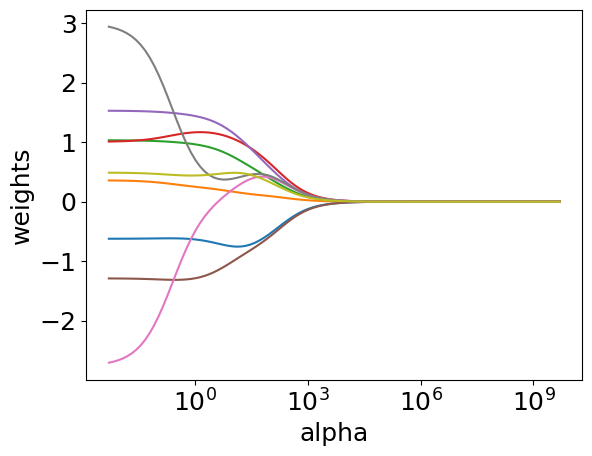

In [32]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [33]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=1)

# Normalisasi hanya berdasarkan X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Gunakan transform() untuk menjaga konsistensi skala

In [34]:
ridge2 = Ridge(alpha=4)  # Hapus normalize=True
ridge2.fit(X_train_scaled, y_train)  # Fit model dengan data yang sudah dinormalisasi
pred2 = ridge2.predict(X_test_scaled)  # Prediksi dengan data test yang juga dinormalisasi

print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2)) # Calculate the test MSE

AKB                    -0.607453
Keluhan Kesehatan       0.607473
Sarana Kesehatan        1.058454
Angka Melek Huruf       0.936433
APS-SMA                 0.711016
Persentase Miskin      -0.219814
PDRB                    0.251129
Pertumbuhan Ekonomi     0.510900
Pengangguran Terbuka    0.526140
dtype: float64
7.707132586132113


In [35]:
ridge3 = Ridge(alpha=10**10)  # Hapus normalize=True
ridge3.fit(X_train_scaled, y_train)  # Fit model dengan data yang sudah dinormalisasi
pred3 = ridge3.predict(X_test_scaled)  # Prediksi dengan data test yang juga dinormalisasi

# Print koefisien regresi
print(pd.Series(ridge3.coef_, index=X.columns))

# Hitung Mean Squared Error (MSE)
print(mean_squared_error(y_test, pred3))

AKB                    -4.564013e-09
Keluhan Kesehatan       1.814386e-09
Sarana Kesehatan        4.284484e-09
Angka Melek Huruf       6.068905e-09
APS-SMA                 3.079861e-09
Persentase Miskin      -4.910514e-09
PDRB                    5.098921e-09
Pertumbuhan Ekonomi     5.161990e-09
Pengangguran Terbuka    3.609187e-09
dtype: float64
37.48226187503708


In [36]:
ridge2 = Ridge(alpha=4)  # Hapus normalize=True
ridge2.fit(X_train_scaled, y_train)  # Fit model dengan data yang sudah dinormalisasi
pred = ridge2.predict(X_test_scaled)  # Prediksi dengan data test yang juga dinormalisasi

print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2)) # Calculate the test MSE

AKB                    -0.607453
Keluhan Kesehatan       0.607473
Sarana Kesehatan        1.058454
Angka Melek Huruf       0.936433
APS-SMA                 0.711016
Persentase Miskin      -0.219814
PDRB                    0.251129
Pertumbuhan Ekonomi     0.510900
Pengangguran Terbuka    0.526140
dtype: float64
7.707132586132113


In [37]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(X_train_scaled, y_train)

# Cek alpha terbaik
ridgecv.alpha_

np.float64(21.643806405415308)

In [38]:
ridge4 = Ridge(alpha=ridgecv.alpha_)  # Hapus normalize=True
ridge4.fit(X_train_scaled, y_train)

# Hitung MSE pada data test
mse = mean_squared_error(y_test, ridge4.predict(X_test_scaled))
print("Mean Squared Error:", mse)

Mean Squared Error: 9.392908657163696


In [39]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

AKB                    -0.049795
Keluhan Kesehatan       0.038137
Sarana Kesehatan        0.136349
Angka Melek Huruf       0.253247
APS-SMA                 0.144626
Persentase Miskin      -0.303898
PDRB                    0.024181
Pertumbuhan Ekonomi     0.060959
Pengangguran Terbuka    0.217480
dtype: float64

# LASSO REGRESSION

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [41]:
# Lasso Regression tanpa normalize=True
lasso = Lasso(max_iter=10000)

coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_scaled, y_train)
    coefs.append(lasso.coef_)

Text(0, 0.5, 'weights')

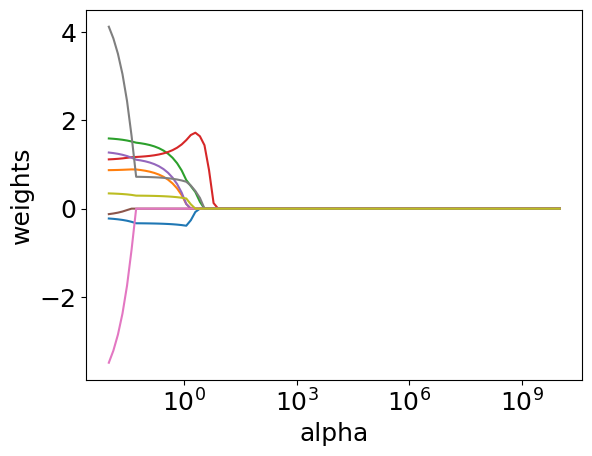

In [42]:
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

# LASSO CV

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000)
lassocv.fit(X_train_scaled, y_train)

# Gunakan alpha terbaik dari LassoCV
lasso = Lasso(alpha=lassocv.alpha_, max_iter=100000)
lasso.fit(X_train_scaled, y_train)

# Hitung MSE pada data test
mse = mean_squared_error(y_test, lasso.predict(X_test_scaled))
print("Mean Squared Error:", mse)

Mean Squared Error: 10.357918335224442


In [45]:
pd.Series(lasso.coef_, index=X.columns)

AKB                    -0.173492
Keluhan Kesehatan       0.000000
Sarana Kesehatan        0.482793
Angka Melek Huruf       1.722500
APS-SMA                 0.000000
Persentase Miskin      -0.000000
PDRB                    0.000000
Pertumbuhan Ekonomi     0.467420
Pengangguran Terbuka    0.007631
dtype: float64